## DSTA 7-b


### Chapter I - Food Webs

#### This __solution__ notebook is taken from the notebook for Ch. 1 of Caldarelli-Cheesa's textbook (CC).

### Read the Adjacency Matrix

###  Q1. Draw the graph from adjacency matrix

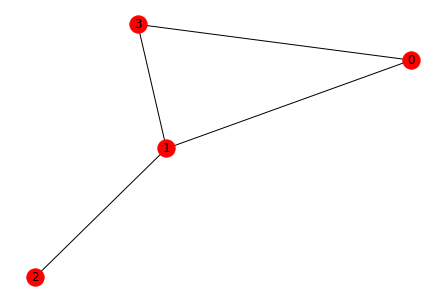

In [45]:
import networkx as nx
import numpy as np
adjacency_matrix=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0],
                  [1,1,0,0]
                  ]

A=np.asarray(adjacency_matrix)
G=nx.from_numpy_matrix(A)
nx.draw(G, with_labels=True)

### Browsing the rows

In [46]:
for row in adjacency_matrix:
    print (row)

[0, 1, 0, 1]
[1, 0, 1, 1]
[0, 1, 0, 0]
[1, 1, 0, 0]


### Browsing the link information

In [47]:
for row in adjacency_matrix:
    for a_ij in row:
        print(a_ij,end=" ")
    print ("\r")

0 1 0 1 
1 0 1 1 
0 1 0 0 
1 1 0 0 


### Directed Networks

###  Q2. Draw the directed graph from adjacency matrix

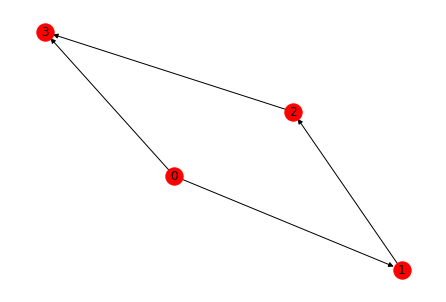

In [48]:
#in the case of directed networks the adjacency matrix is not symetric, like for Food Wes
#if a non zero element is present in row 2, column 3, this means there is an arc (directed edge)
#from node 2 toward node 3
adjacency_matrix_directed=[
                  [0,1,0,1],
                  [0,0,1,0],
                  [0,0,0,1],
                  [0,0,0,0]
                  ]
A=np.asarray(adjacency_matrix_directed)
G=nx.from_numpy_matrix(A, create_using=nx.MultiDiGraph())
nx.draw(G, with_labels=True)

## Basic Statistics

In [49]:
#the number of species is the number of rows or columns of 
#the adjacency matrix
num_species=len(adjacency_matrix_directed[0])

#the number of links or predations is the non zero elements 
#of the adjacency matrix (this holds for directed graphs
num_predations=0
for i in range(num_species):
    for j in range(num_species):
        if adjacency_matrix_directed[i][j]!=0:
            num_predations=num_predations+1

#to check if a specie is a Basal (B), an Intermediate (I) or
#a Top (T) one  we have to check the presence of 1s both in 
#the row and in the column of each specie
row_count=[0,0,0,0]
column_count=[0,0,0,0]
for i in range(num_species):
    for j in range(num_species):
        row_count[i]=row_count[i]+adjacency_matrix_directed[i][j]
        column_count[j]=column_count[j]+ \
        adjacency_matrix_directed[i][j]

number_B=0
number_I=0
number_T=0

for n in range(num_species):
    if row_count[n]==0:
        number_T+=1
        continue
    if column_count[n]==0:
        number_B+=1
        continue
    else:
        number_I+=1
   
print ("number of species", num_species)
print ("number of predations", num_predations)
print ("classes Basal, Top, Intermediate: ",number_B,number_T,number_I)
print ("connectance", float(num_predations)/float(num_species**2))

number of species 4
number of predations 4
classes Basal, Top, Intermediate:  1 1 2
connectance 0.25


## The Degree

In [50]:
#for the undirected network
degree_node_2=0
for j in adjacency_matrix[1]:
    degree_node_2=degree_node_2+j
print ("degree of node 2:",degree_node_2)

#and for the directed case we already calculated the sum over 
#the rows and columns for the adjacency_matrix_directed
out_degree_node_3=row_count[2]
in_degree_node_4=column_count[3]

print( "out_degree node 3:",out_degree_node_3)
print ("in_degree node 4:",in_degree_node_4)

degree of node 2: 3
out_degree node 3: 1
in_degree node 4: 2


###  Q3. Draw the histogram of degree distribution from adjacency matrix

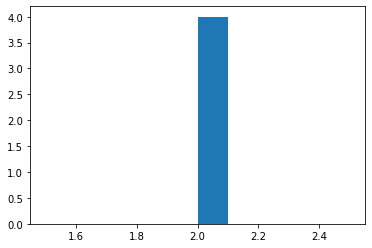

In [51]:
import matplotlib.pyplot as plt
def plot_degree_dist(G):
    #print(G.nodes())
    degrees = [G.degree(n) for n in G.nodes()]
    #print(degrees)
    plt.hist(degrees)
    plt.show()
plot_degree_dist(G)
#plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))

## Degree in Networkx

In [52]:
import networkx as nx

#generate an empty graph
G=nx.Graph()

#define the nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

#link the nodes
G.add_edge(1,2)
G.add_edge(1,4)
G.add_edge(2,3)
G.add_edge(2,4)

#degree of the node 2
print(G.degree(2))

3


###  Q4. Draw the graph and degree distribution histogram for the above. 

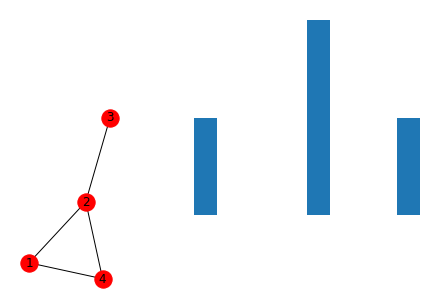

In [53]:
nx.draw(G, with_labels=True)
plot_degree_dist(G)


## Clustering Coefficient

In [54]:
row=1 #stands for the node 2
node_index_count=0
node_index_list=[]
for a_ij in adjacency_matrix[row]:
    if a_ij==1:
        node_index_list.append(node_index_count)
    node_index_count=node_index_count+1    
print ("\r")

print (node_index_list)

#then we will check for all the possible neighbours couples if a link actually exist:

neighb_conn=0
for n1 in node_index_list:
    for n2 in node_index_list:
        if adjacency_matrix[n1][n2]==1:
            neighb_conn=neighb_conn+1
   
#we have indeed counted them twice...
neighb_conn=neighb_conn/2.0

print (neighb_conn)

#Finally the clustering coefficient for node '2' is given by the expression:

clustering_coefficient=neighb_conn/ \
(degree_node_2*(degree_node_2-1)/2.0) 

print (clustering_coefficient)


[0, 2, 3]
1.0
0.3333333333333333


## Distance with Breadth First Search

### create the undirected graph

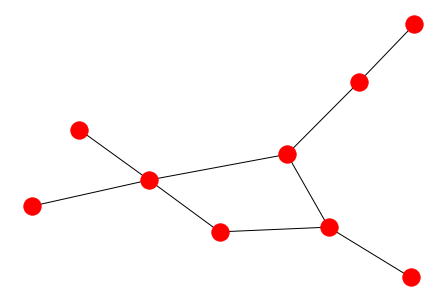

In [55]:
#creating the graph
G=nx.Graph()
G.add_edges_from([('A','B'),('A','C'),('C','D'),('C','E'),('D','F'),
('D','H'),('D','G'),('E','H'),('E','I')])

#printing the neighbors of the node 'A'
print (G.neighbors('A'))

nx.draw(G)

In [56]:
root_node='A'
queue=[]
queue.append('A')
G.node['A']["distance"]=0
while len(queue):
    working_node=queue.pop(0)
    for n in G.neighbors(working_node):
        if len(G.node[n])==0:
            G.node[n]["distance"]=G.node[working_node]["distance"]+1
            queue.append(n)
for n in G.nodes():
    print (n,G.node[n]["distance"])
    

A 0
B 1
C 1
D 2
E 2
F 3
H 3
G 3
I 3


## Reading the file with Food Web data

In [57]:
file_name="./chapter_1_data/Little_Rock_Lake.txt"

DG = nx.DiGraph()

in_file=open(file_name,'r')
while True:
    next_line=in_file.readline()
    if not next_line:
        break
    next_line_fields=next_line[:-2].split(' ')
    node_a=next_line_fields[1] #there is a space in the beginning 
                               #of each edge
    node_b=next_line_fields[2]
    print (node_a,node_b)
    DG.add_edge(node_a, node_b)

0 1
0 6
0 8
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 13
0 13
0 13
0 13
0 13
0 13
0 13
0 13
0 13
0 13
0 14
0 14
0 14
0 14
0 14
0 14
0 14
0 14
0 14
0 14
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 16
0 16
0 16
0 16
0 16
0 16
0 16
0 16
0 16
0 16
0 17
0 17
0 17
0 17
0 17
0 17
0 17
0 17
0 17
0 17
0 18
0 18
0 18
1 
1 
1 
1 
1 
1 1
1 1
2 
2 11
3 
3 
3 
3 
3 
3 1
3 1
3 11
4 
4 11
5 
5 
5 
5 
5 
5 1
5 1
5 11
6 
6 11
7 
7 
7 
7 
7 
7 1
7 1
7 11
8 
8 11
9 
9 
9 
9 
9 
9 11
10 
10 
10 
10 
10 
11 
11 
11 
11 
11 1
12 
12 
12 
12 
12 
12 
12 1
12 1
12 1
12 1
12 1
12 2
12 2
12 3
12 4
12 7
13 
13 
13 
13 
13 
13 1
13 1
13 1
13 1
13 2
13 2
13 4
13 7
14 
14 
14 
14 
14 
14 
14 1
14 1
14 1
14 1
14 2
14 2
14 4
14 7
15 
15 
15 
15 
15 
15 
15 1
15 1
15 1
15 1
15 1
15 2
15 2
15 4
15 7
16 
16 
16 
16 
16 
16 
16 
16 
16 1
16 1
16 2
16 2
16 7
17 
17 
17 
17 
17 
17 
17 1
17 1
17 1
17 1
17 1
17 2
17 2
17 3
17 4
17 6
17 7
18 
18 
18 
18 
18 
18 1
18 1
18 1
18 1
18 1
18 2
18 2
18 3
18 4
18 6
18 7
19 
19 
19

###  Q5. Draw the graph and degree distribution histogram for the above. 

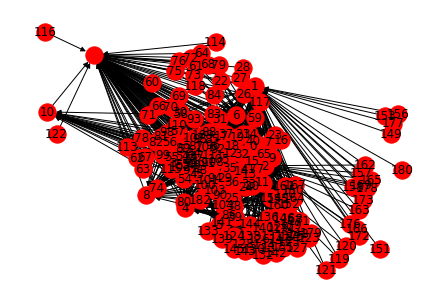

In [58]:
nx.draw(DG,with_labels=True)

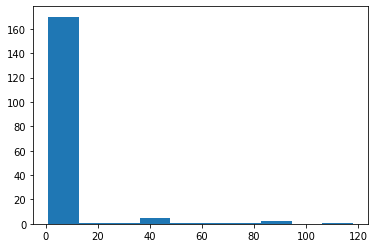

In [59]:
plot_degree_dist(DG)

## Trophic Species

## Defining the trophic pattern key
this is a way to generate a unique key starting from the ordered lists of preys and predators attached to nodes

In [60]:
def get_node_key(node):
    out_list=[]
    for out_edge in DG.out_edges(node):
        out_list.append(out_edge[1])
    in_list=[]
    for in_edge in DG.in_edges(node):
        in_list.append(in_edge[0])
    out_list.sort()
    out_list.append('-')
    in_list.sort()
    out_list.extend(in_list)
    return out_list

## Grouping the Trophic Species and Regenerating the Trophic network

In [61]:
def TrophicNetwork(DG):
    trophic={}
    for n in DG.nodes():
        k=tuple(get_node_key(n))
        if not k in trophic:
            trophic[k]=[]
        trophic[k].append(n)
    for specie in trophic.keys():
        if len(trophic[specie])>1:
            for n in trophic[specie][1:]:
                DG.remove_node(n)
    return DG

#deleting the environment
#DG.remove_node('0')

TrophicDG=TrophicNetwork(DG)
print ("S:",TrophicDG.number_of_nodes())
print ("L:",TrophicDG.number_of_edges())
print ("L/S:",float(TrophicDG.number_of_edges())/ \
TrophicDG.number_of_nodes())

S: 50
L: 201
L/S: 4.02


## Classes in Food Webs

In [62]:
def compute_classes(DG):
    basal_species=[]
    top_species=[]
    intermediate_species=[]
    for n in DG.nodes():
        if DG.in_degree(n)==0:
            basal_species.append(n)
        elif DG.out_degree(n)==0:
            top_species.append(n)
        else:
            intermediate_species.append(n)
    return (basal_species,intermediate_species,top_species)

(B,I,T)=compute_classes(TrophicDG)
print ("B:",float(len(B))/(len(B)+len(T)+len(I)))
print ("I:",float(len(I))/(len(B)+len(T)+len(I)))
print ("T:",float(len(T))/(len(B)+len(T)+len(I)))

B: 0.68
I: 0.3
T: 0.02


## Proportion of links among classes and ratio prey/predators

In [63]:
def InterclassLinkProportion(DG,C1,C2):
    count=0
    for n1 in C1:
        for n2 in C2:
            if DG.has_edge(n1,n2):
                count+=1
    return float(count)/DG.number_of_edges()
    
print ("links in BT:",InterclassLinkProportion(TrophicDG,B,T))
print ("links in BI:",InterclassLinkProportion(TrophicDG,B,I))
print ("links in II:",InterclassLinkProportion(TrophicDG,I,I))
print ("links in IT:",InterclassLinkProportion(TrophicDG,I,T))

#Ratio prey/predators
print ("P/R:",float((len(B)+len(I)))/(len(I)+len(T)))

links in BT: 0.12437810945273632
links in BI: 0.6467661691542289
links in II: 0.15422885572139303
links in IT: 0.07462686567164178
P/R: 3.0625
